<center><font color='black' style='font-family:verdana; font-size:25px'>Restaurant Recommendation System</font></center>
<hr style="color: black; height: 1px;">

<b><font color='#067F7D' style='font-family:cambria; font-size:20px'>Background:</font></b>
<br>

<font color="black" style="font-family:Cambria; font-size:16px">In today's digital age, dining out and exploring new cuisines has become a popular activity. However, with an abundance of dining options available, choosing a restaurant that matches personal preferences can be overwhelming. To address this challenge, we aim to develop a Restaurant Recommendation System using machine learning techniques.</font>
<br>

<b><font color='#067F7D' style='font-family:cambria; font-size:20px'>Objective:</font></b>
<br>

<font color="black" style="font-family:Cambria; font-size:16px">The objective of this project is to build a robust recommendation system that suggests restaurants based on user preferences, such as cuisine type and location. This system will leverage machine learning models to analyze restaurant data and provide personalized recommendations to users.</font>
<br>

<b><font color='#067F7D' style='font-family:cambria; font-size:20px'>Data Description:</font></b>
<br>

<font color="black" style="font-family:Cambria; font-size:16px">The dataset consists of information about various restaurants, including:</font>
<br>

- <font color="black" style="font-family:Cambria; font-size:16px">`Restaurant Name`</font>
<br>

- <font color="black" style="font-family:Cambria; font-size:16px">`Cuisines offered`</font>
<br>

- <font color="black" style="font-family:Cambria; font-size:16px">`City and locality`</font>
<br>

- <font color="black" style="font-family:Cambria; font-size:16px">`Average cost for two people`</font>
<br>

- <font color="black" style="font-family:Cambria; font-size:16px">`Ratings text`</font>
<br>

<b><font color='#067F7D' style='font-family:cambria; font-size:20px'>Key Tasks:</font></b>
<br>

<b><font color='#067F7D' style='font-family:cambria; font-size:20px'>`Data Preprocessing and Feature Extraction:`</font></b>
<br>

- <font color="black" style="font-family:Cambria; font-size:16px">`Clean and preprocess the restaurant data.`</font>
<br>

- <font color="black" style="font-family:Cambria; font-size:16px">Extract features such as `cuisine types` using `natural language processing` techniques.</font>
<br>

- <font color="black" style="font-family:Cambria; font-size:16px">Utilize techniques like `TF-IDF` (Term Frequency-Inverse Document Frequency) to represent textual data.</font>
<br>

<b><font color='#067F7D' style='font-family:cambria; font-size:20px'>Model Development:</font></b>
<br>

- <font color="black" style="font-family:Cambria; font-size:16px">Build a `cosine similarity matrix` based on `restaurant features` to measure similarity between restaurants.</font>
<br>

- <font color="black" style="font-family:Cambria; font-size:16px">Develop a `machine learning model` that recommends restaurants based on user preferences (e.g., preferred cuisine).</font>
<br>

<b><font color='#067F7D' style='font-family:cambria; font-size:20px'>Deployment:</font></b>
<br>

- <font color="black" style="font-family:Cambria; font-size:16px">Deploy the recommendation system using `Streamlit`, allowing users to interactively `select cuisine preferences` and receive real-time restaurant recommendations.</font>
<br>

- <font color="black" style="font-family:Cambria; font-size:16px">Ensure the system is `user-friendly` and provides `clear, accurate` recommendations.</font>
<br>

<b><font color='#067F7D' style='font-family:cambria; font-size:20px'>Expected Outcome:</font></b>
<br>

<font color="black" style="font-family:Cambria; font-size:16px">The Restaurant Recommendation System aims to enhance user dining experiences by providing personalized recommendations tailored to individual preferences. By leveraging machine learning and natural language processing techniques, the system will help users discover new dining options suited to their tastes and preferences efficiently.</font>
<br>

<b><font color='#067F7D' style='font-family:cambria; font-size:20px'>Evaluation:</font></b>
<br>

<font color="black" style="font-family:Cambria; font-size:16px">The system's performance will be evaluated based on its ability to accurately recommend restaurants that align with user preferences. Metrics such as precision, recall, and user satisfaction surveys will be used to assess the system's effectiveness and usability.</font>
<br>

<b><font color='#067F7D' style='font-family:cambria; font-size:20px'>Conclusion:</font></b>
<br>

<font color="black" style="font-family:Cambria; font-size:16px">By developing an effective Restaurant Recommendation System, we aim to simplify the process of choosing dining options for users, enhance their dining experiences, and promote exploration of diverse cuisines and restaurants.</font>
<br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


import warnings
warnings.filterwarnings('ignore')


<font color="black" style="font-family:Cambria; font-size:20px">Reading the dataset</font>

In [2]:
df=pd.read_csv('Dataset .csv')

In [3]:
# head
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [4]:
print('The Shape Of the data set is :' ,df.shape)

The Shape Of the data set is : (9551, 21)


In [5]:
# information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

<font color="black" style="font-family:cambria; font-size:18px">Arranging the data in a good format Categorical one side and Numerical Columns are another side </font>

In [6]:
catogorical=df.select_dtypes('object')

In [7]:
numerical=df[['Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']]

In [8]:
numerical.columns

Index(['Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'], dtype='object')

In [9]:
df=pd.concat([df['Restaurant ID'],catogorical,numerical],axis=1)

In [10]:
df.rename(columns={'Average Cost for two': 'Avg_cost_for_2'},inplace=True)

In [11]:
df.head(2)

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text,Country Code,Longitude,Latitude,Avg_cost_for_2,Price range,Aggregate rating,Votes
0,6317637,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent,162,121.027535,14.565443,1100,3,4.8,314
1,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent,162,121.014101,14.553708,1200,3,4.5,591


<font color="black" style="font-family:Cambria; font-size:20px">Checking Null Values</font>

In [12]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Cuisines                9
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Rating color            0
Rating text             0
Country Code            0
Longitude               0
Latitude                0
Avg_cost_for_2          0
Price range             0
Aggregate rating        0
Votes                   0
dtype: int64


<b><font color='Black' style='font-family:cambria; font-size:20px'>Handling Missing Values:</font></b>
<br>

<font color="brown" style="font-family:cambria; font-size:14px">`Our DataFrame` (df) `does not` have any `missing values` except in the `Cuisines column`, where there are `9 missing values`. Handling missing values is an `important step` in data preprocessing to ensure accurate analysis and modeling. Here are `some common approaches` we can consider: </font>

<font color="black" style="font-family:Cambria; font-size:18px">`1. Drop rows with missing values:`</font>
<br>

- <font color="brown" style="font-family:Cambria; font-size:14px">If the `number of rows` with missing values is `small relative` to the dataset size and `does not significantly` impact `our analysis`, we can  `drop these rows also`.</font>
<br>

<font color="black" style="font-family:Cambria; font-size:18px">`2. Imputation :`</font>
<br>

- <font color="brown" style="font-family:Cambria; font-size:14px">`Replace missing values` with a suitable substitute, such as the `mean, median, mode`, or a custom value based on the data's distribution and characteristics.</font>
<br>


<font color="brown" style="font-family:cambria; font-size:14px">`Cuisines is a `categorical column` with missing values, we can `handle them differently` compabrown to `numerical columns`. one  approach can be </font>

<b><font color='Black' style='font-family:cambria; font-size:20px'>Handling Missing Values in Categorical Columns:</font></b>
<br>

<font color="brown" style="font-family:cambria; font-size:14px">`Mode Imputation:` Replace missing values with the `most frequent category (mode)` since it's a categorical column.</font>


In [13]:
df['Cuisines'].mode()[0]

'North Indian'

In [14]:
# filling 9 na values with north Indian
df['Cuisines'].fillna(df['Cuisines'].mode()[0],inplace=True)


<b><font color='Black' style='font-family:cambria; font-size:20px'>Cleaning `Special Characters` from DataFrame Columns:</font></b>
<br>

<font color="brown" style="font-family:cambria; font-size:17px">`Special characters`, such as `non-ASCII` symbols or `invalid UTF-8` characters, can often be present in text data due to various reasons such as `encoding issues` or `data collection methods`. Cleaning these characters is essential for several reasons: </font>

<font color="brown" style="font-family:Cambria; font-size:14px">`1. Data Integrity :`Removing special characters ensures that your data remains consistent and readable.</font>
<br>

<font color="brown" style="font-family:Cambria; font-size:14px">`2. Normalization :`By removing special characters, you normalize the text data, making it uniform and suitable for downstream tasks such as machine learning model training</font>
<br>

<font color="brown" style="font-family:Cambria; font-size:14px">`3. Improving the data Quality : `Clean data enhances the quality and reliability of analysis results. It blackuces the risk of errors caused by unexpected characters that may not be handled correctly by algorithms or applications.</font>
<br>


In [15]:
# Assuming df is your DataFrame and you want to clean specific columns
name = ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose','Currency']

In [16]:
df[name].tail()

,Restaurant Name,City,Address,Locality,Locality Verbose,Currency
9546,Naml۱ Gurme,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",Turkish Lira(TL)
9547,Ceviz A��ac۱,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",Turkish Lira(TL)
9548,Huqqa,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",Turkish Lira(TL)
9549,A���k Kahve,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",Turkish Lira(TL)
9550,Walter's Coffee Roastery,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",Turkish Lira(TL)


<font color="brown" style="font-family:cambria; font-size:17px">The `loop iterates` through each specified column (name) and applies the `cleaning operation`, ensuring that special characters are removed uniformly across all selected columns. </font>
<br>



In [17]:
for i in name:
    df[i] = df[i].str.replace(r'[^\x00-\x7F]+', '', regex=True)

In [18]:
df[name].tail()

,Restaurant Name,City,Address,Locality,Locality Verbose,Currency
9546,Naml Gurme,stanbul,"Kemanke Karamustafa Paa Mahallesi, Rhtm Caddes...",Karak_y,"Karak_y, stanbul",Turkish Lira(TL)
9547,Ceviz Aac,stanbul,"Kouyolu Mahallesi, Muhittin st_nda Caddesi, No...",Kouyolu,"Kouyolu, stanbul",Turkish Lira(TL)
9548,Huqqa,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 5...",Kuru_eme,"Kuru_eme, stanbul",Turkish Lira(TL)
9549,Ak Kahve,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 6...",Kuru_eme,"Kuru_eme, stanbul",Turkish Lira(TL)
9550,Walter's Coffee Roastery,stanbul,"Cafeaa Mahallesi, Bademalt Sokak, No 21/B, Kad...",Moda,"Moda, stanbul",Turkish Lira(TL)


In [19]:
df.duplicated().sum()

0

<font color="brown" style="font-family:cambria; font-size:17px">By cleaning special characters in this manner, we prepare  data for `further analysis` or application without the risk of encountering unexpected issues related to non-standard characters. </font>

In [20]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Avg_cost_for_2,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


<font color="black" style="font-family:Cambria; font-size:20px">Exploratory Data Analysis</font>

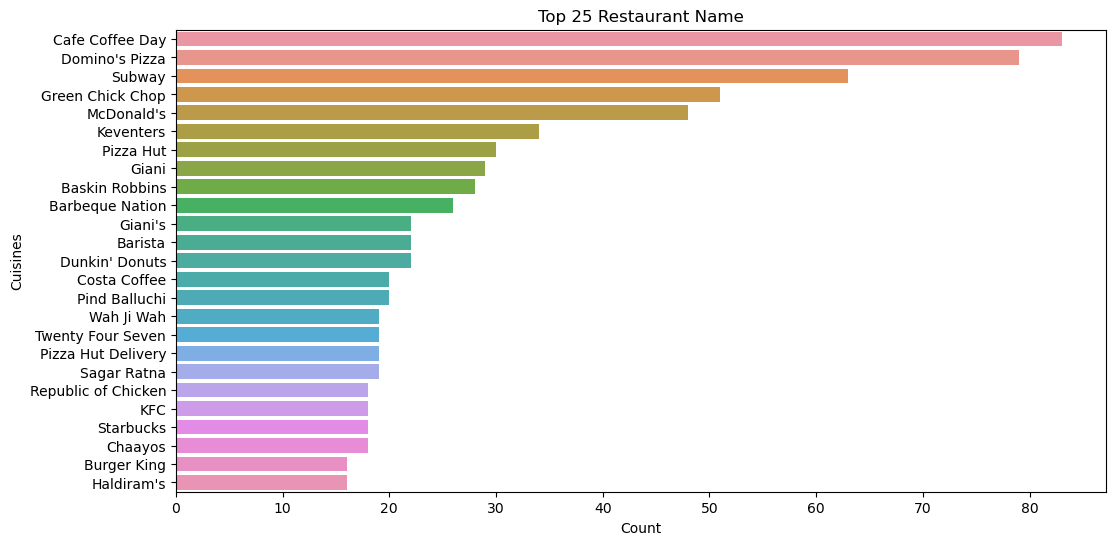

In [21]:

# Bar plot for Restaurant Name (Top 25)
plt.figure(figsize=(12, 6))
top_restaurant = df['Restaurant Name'].value_counts().head(25)
sns.barplot(x=top_restaurant.values, y=top_restaurant.index)
plt.title('Top 25 Restaurant Name')
plt.xlabel('Count')
plt.ylabel('Cuisines')
plt.show()

<b><font color=black style='font-family:Cambria; font-size:17px'> `Top 25 Restaurant Names` </font></b><br>

<font color=blue style='font-family:Cambria; font-size:15px'>The `horizontal bar chart` titled `Top 25 Restaurant Names` displays the count of different restaurant names. Each bar represents a restaurant, and they are color-coded. Here are some notable observations:</font><br><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>`Cafe Coffee Day`: Appears to be the most popular restaurant with a count close to `80`.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>`Domino’s Pizza, Subway, and Green Chick Chop`: Also have significant counts.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>`Burger King`: Has the lowest count among the top `25` restaurants.</font><br>


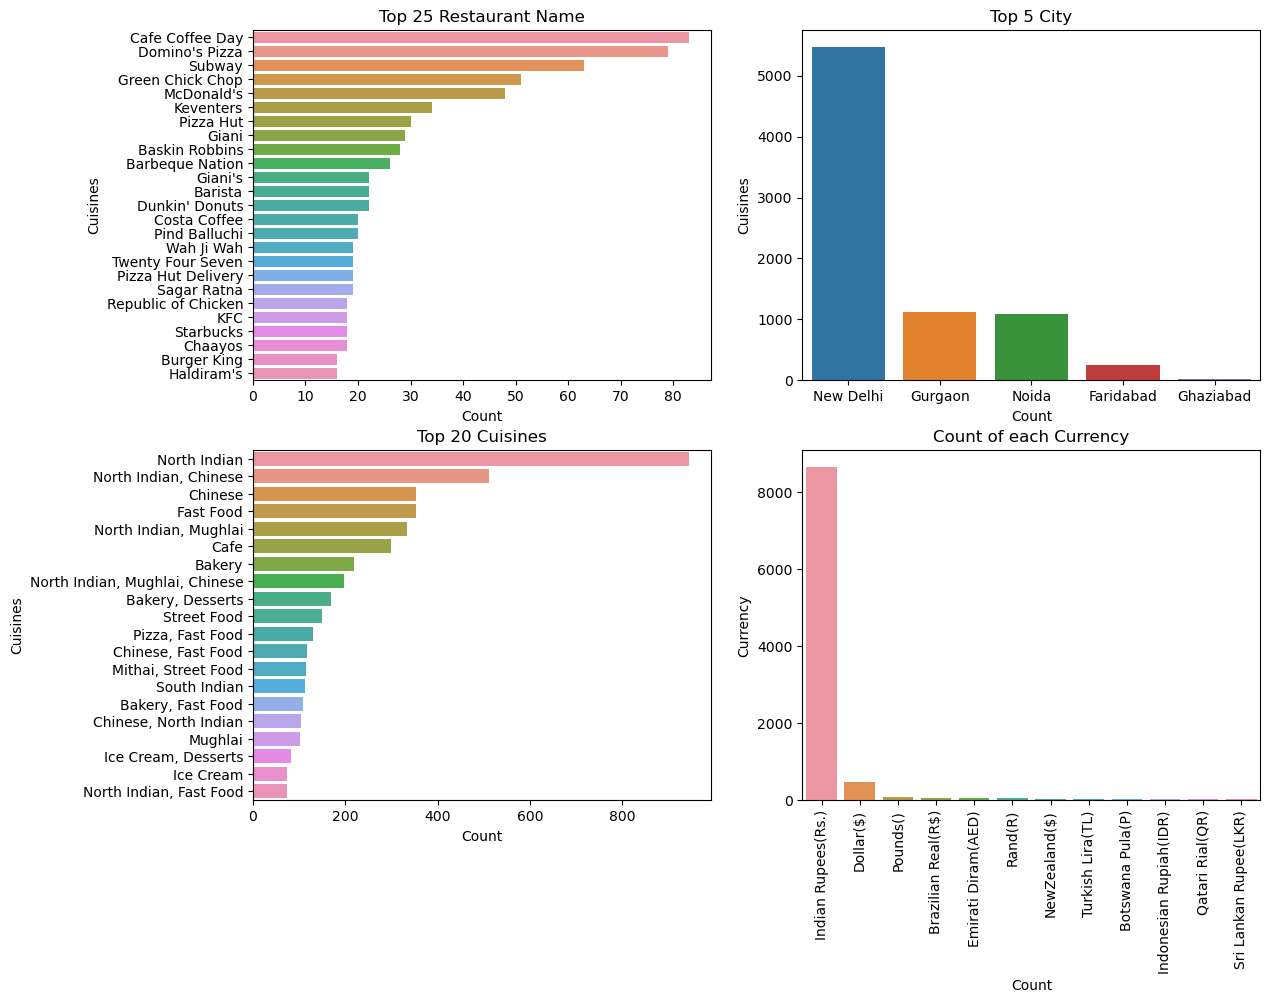

In [22]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)

top_restaurant = df['Restaurant Name'].value_counts().head(25)
sns.barplot(x=top_restaurant.values, y=top_restaurant.index)
plt.title('Top 25 Restaurant Name')
plt.xlabel('Count')
plt.ylabel('Cuisines')


plt.subplot(2,2,2)
top_city = df['City'].value_counts().head(5)
sns.barplot(y=top_city.values, x=top_city.index)
plt.title('Top 5 City')
plt.xlabel('Count')
plt.ylabel('Cuisines')

plt.subplot(2,2,3)
top_cuisines = df['Cuisines'].value_counts().head(20)
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title('Top 20 Cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisines')

plt.subplot(2,2,4)
sns.barplot(y=df['Currency'].value_counts().values,x=df['Currency'].value_counts().index)
plt.title('Count of each Currency')
plt.xlabel('Count')
plt.ylabel('Currency')
plt.xticks(rotation=90)

plt.show()

<b><font color=black style='font-family:Cambria; font-size:17px'> `Visualization 2` </font></b><br>

<font color=blue style='font-family:Cambria; font-size:15px'>`Top 25 Restaurant Names`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The image displays a `horizontal bar chart` showing the `top 25 restaurant` names. Some notable names include  `Cafe Coffee Day,   Domino’s Pizza,   Subway,  and  McDonald’s....`. </font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>These popular restaurants could be relevant for market analysis or competitive research.</font><br><br>



<font color=blue style='font-family:Cambria; font-size:15px'>`Top 5 Cities`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The `vertical bar chart` highlights the `top 5 cities`. Notable cities include  `New Delhi,   Gurgaon,   Noida,  and  Faridabad`. </font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>This data could be useful for understanding regional preferences or targeting specific locations for restaurant expansion.</font><br><br>



<font color=blue style='font-family:Cambria; font-size:15px'>`Top 20 Indian Cuisines`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>Another `horizontal bar chart` shows the `top 20 Indian cuisines`. Common cuisines include  `North Indian,   Chinese,  and  Mughlai`. </font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>This information could guide menu planning or help identify culinary trends.</font><br><br>



<font color=blue style='font-family:Cambria; font-size:15px'>`Count of Each Currency`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The `vertical bar chart` represents the count of different currencies used. Notable `currencies` include  `Indian Rupees (Rs),   US Dollars ($),  and  British Pounds (£)`. </font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>Understanding currency usage can be valuable for financial analysis or pricing strategies.</font><br>


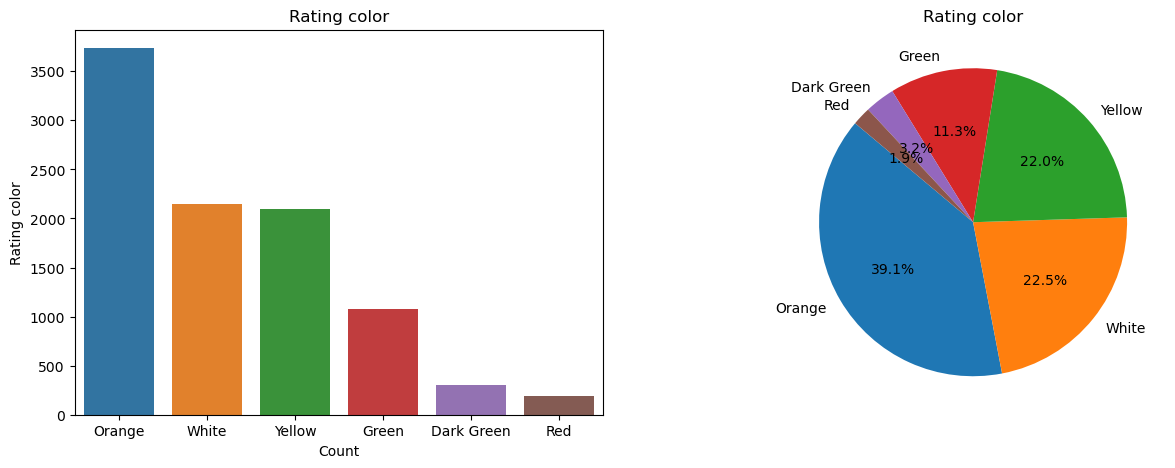

In [23]:
# Bar plot for Rating color
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)

sns.barplot(y=df['Rating color'].value_counts().values, x=df['Rating color'].value_counts().index)
plt.title('Rating color')
plt.xlabel('Count')
plt.ylabel('Rating color')

# Pie chart for Rating color
plt.subplot(1,2,2)

df['Rating color'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Rating color')
plt.ylabel('')

plt.show()

<b><font color=black style='font-family:Cambria; font-size:17px'> `Visualization 3` </font></b>
<br>

<b><font color=black style='font-family:Cambria; font-size:17px'> `Rating Color Distribution` </font></b><br>

<font color=blue style='font-family:Cambria; font-size:15px'>The `left bar chart` displays six different colors: `orange, white, yellow, green, dark green, and red.`</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>Each color represents a `rating category.`</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The `vertical axis` shows the `Rating count,` ranging from `0 to 3500.`</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>Notably, the `blue bar` (representing `No`) dominates the chart, indicating a higher count for that rating color.</font><br><br>

<font color=blue style='font-family:Cambria; font-size:15px'>`Percentage Breakdown`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The `right pie chart` further breaks down the rating colors:</font><br>

  - <font color=blue style='font-family:Cambria; font-size:15px'>`Green: 39.1%`</font><br>

  - <font color=blue style='font-family:Cambria; font-size:15px'>`Yellow: 22.0%`</font><br>

  - <font color=blue style='font-family:Cambria; font-size:15px'>`White: 22.5%`</font><br>

  - <font color=blue style='font-family:Cambria; font-size:15px'>`Dark Green: 11.3%`</font><br>

  - <font color=blue style='font-family:Cambria; font-size:15px'>`Red: 5.1%`</font><br><br>


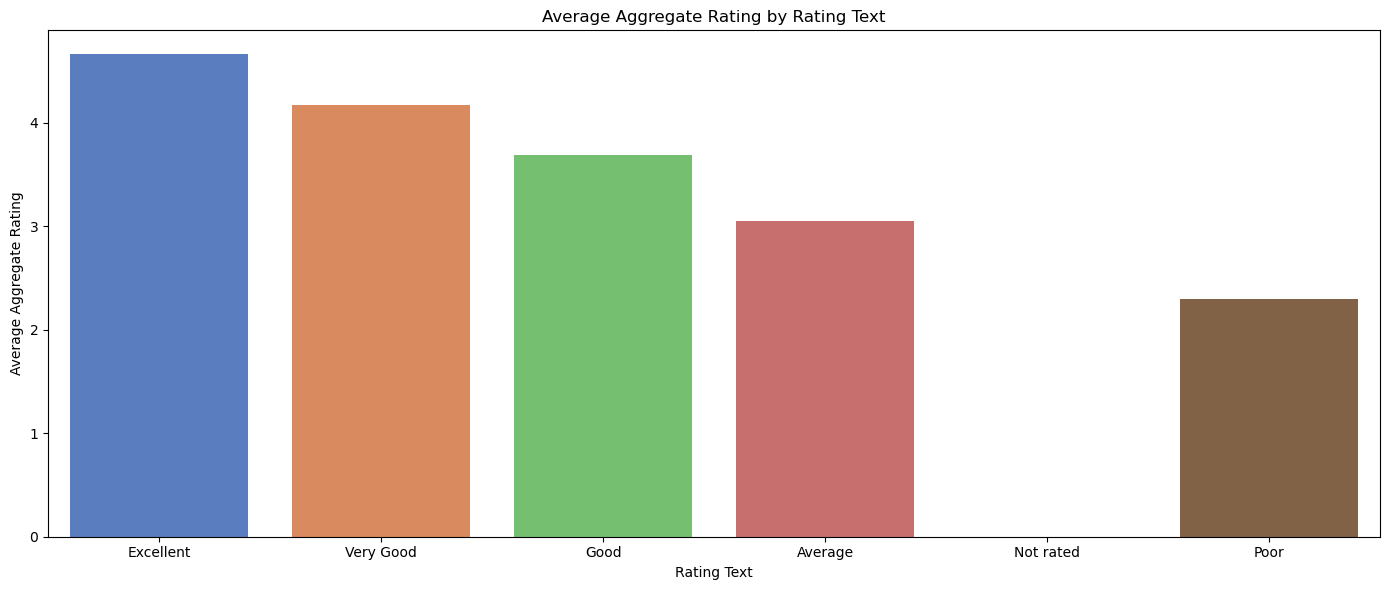

In [24]:
# Bar plot of average 'Aggregate rating' by 'Rating text'
plt.figure(figsize=(14, 6))
sns.barplot(x='Rating text', y='Aggregate rating', data=df, palette='muted', ci=None)
plt.title('Average Aggregate Rating by Rating Text')
plt.xlabel('Rating Text')
plt.ylabel('Average Aggregate Rating')
plt.tight_layout()
plt.show()


<b><font color=black style='font-family:Cambria; font-size:17px'> `Visualization 4` </font></b>
<br>

<b><font color=black style='font-family:Cambria; font-size:17px'> `Average Aggregate Rating by Rating Text` </font></b><br>

<font color=blue style='font-family:Cambria; font-size:15px'>The bar chart provides an overview of `average aggregate ratings` across different `rating categories`.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>Here’s a breakdown of the ratings:</font><br>

<font color=blue style='font-family:Cambria; font-size:15px'>`Excellent`:The highest `average aggregate rating`, exceeding 4.</font><br>

<font color=blue style='font-family:Cambria; font-size:15px'>`Very Good`:Just below 4, indicating strong satisfaction.</font><br>

<font color=blue style='font-family:Cambria; font-size:15px'>`Good`:In the mid-3 range, representing positive feedback.</font><br>


<font color=blue style='font-family:Cambria; font-size:15px'>`Average`:Slightly above 2, suggesting room for improvement.</font><br>

<font color=blue style='font-family:Cambria; font-size:15px'>`Not rated`:No visible data, possibly indicating missing or unsubmitted ratings.</font><br>


<font color=blue style='font-family:Cambria; font-size:15px'>`Poor`:An `average aggregate rating` of approximately 1, signifying dissatisfaction.</font><br>



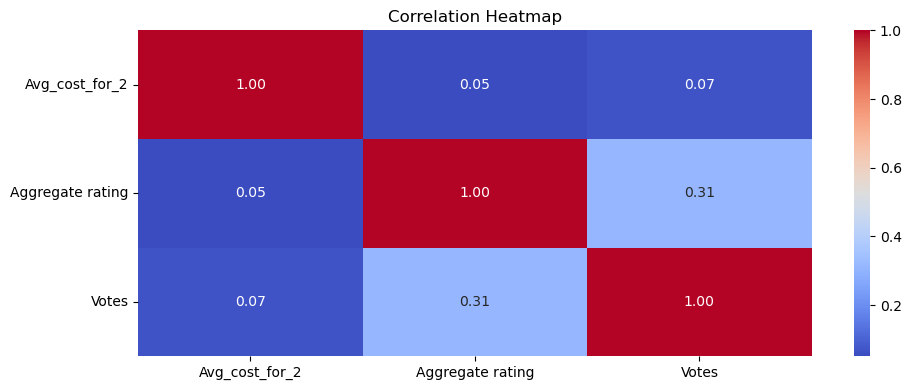

In [25]:
# Heatmap of correlations between numerical variables
plt.figure(figsize=(10,4))
sns.heatmap(df[['Avg_cost_for_2', 'Aggregate rating', 'Votes']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


<b><font color=black style='font-family:Cambria; font-size:17px'> `Visualization 5` </font></b>
<br>

<b><font color=black style='font-family:Cambria; font-size:17px'> `Correlation Heatmap` </font></b><br>

<font color=blue style='font-family:Cambria; font-size:15px'>The heatmap visually represents the `correlation matrix` between three variables:  `Average Cost for two,   Aggregate rating,  and  Votes`. </font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>Colors range from `blue` (positive correlation) to `red` (negative correlation), with `white` indicating little or no correlation.</font><br>

<font color=blue style='font-family:Cambria; font-size:15px'>Key observations:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Aggregate rating`   have a `positive correlation` with  Votes. </font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Average Cost for two`  shows `minimal correlation` with both  `Aggregate rating  and  Votes`. </font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> Aggregate rating  and  Votes  exhibit a `moderate positive correlation`.</font><br>


In [26]:
from wordcloud import WordCloud

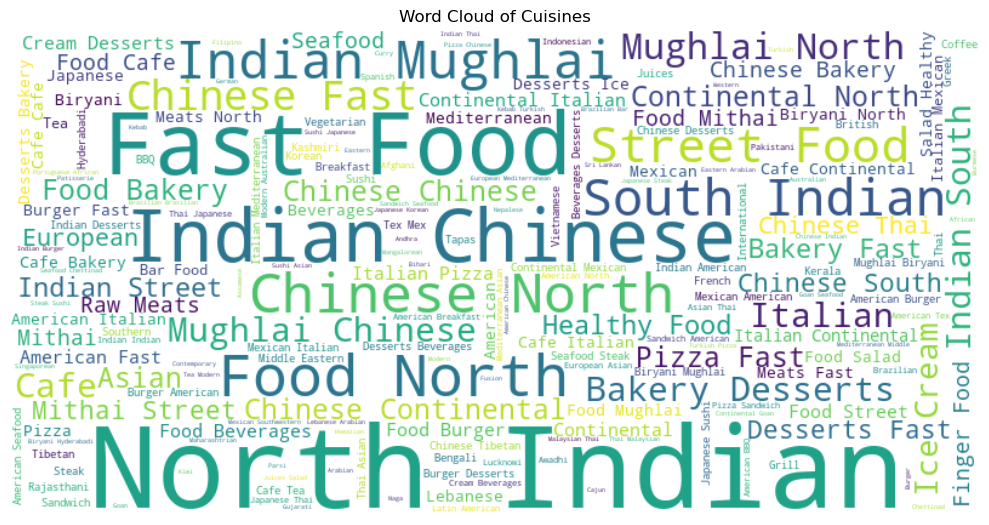

In [27]:
cuisine_text=' '.join(df['Cuisines'].dropna())
word_cloud=WordCloud(width=800,height=400,background_color='white').generate(cuisine_text)
plt.figure(figsize=(10, 6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title('Word Cloud of Cuisines')
plt.axis('off')
plt.tight_layout()
plt.show()

<b><font color=black style='font-family:Cambria; font-size:17px'> `Visualization 6` </font></b><br>

<font color=blue style='font-family:Cambria; font-size:15px'>`Word Cloud of Cuisines`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The word cloud visualizes the `frequency of different cuisines` mentioned in the dataset. Here are some observations:</font><br><br>

<font color=blue style='font-family:Cambria; font-size:15px'>`Most Common Cuisines`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>`North Indian,   Chinese,   Fast Food,  and  South Indian` are the most frequently mentioned cuisines. </font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>Other popular cuisines include `Mughlai,   Bakery,  and  Street Food`.</font><br><br>

<font color=blue style='font-family:Cambria; font-size:15px'>`Diversity`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The dataset contains a `wide variety of cuisines`, indicating a diverse restaurant market.</font><br>


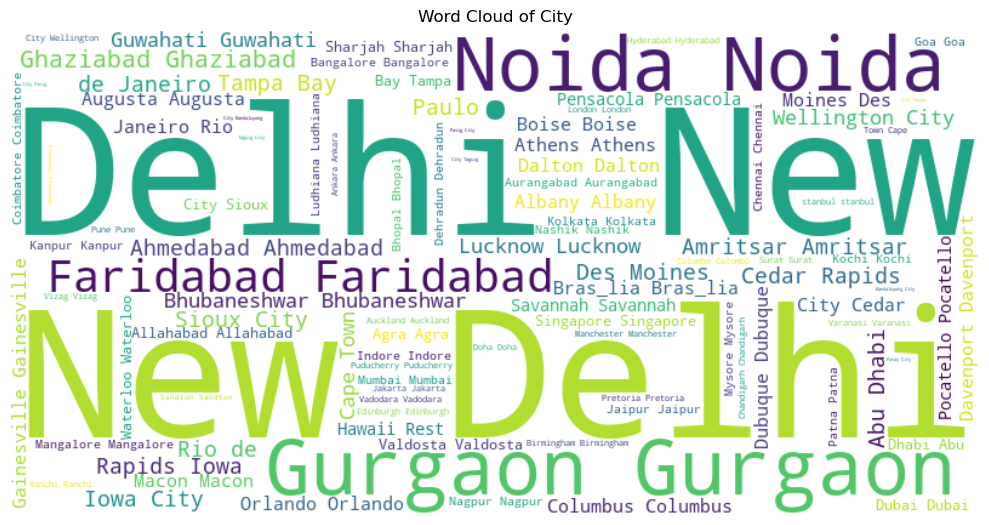

In [28]:
city_text=' '.join(df['City'].dropna())
word_cloud=WordCloud(width=800,height=400,background_color='white').generate(city_text)
plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.title('Word Cloud of City')
plt.axis('off')
plt.tight_layout()
plt.show()

<b><font color=black style='font-family:Cambria; font-size:17px'> `Visualization 7` </font></b><br>

<font color=blue style='font-family:Cambria; font-size:15px'>`Word Cloud of City`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The word cloud visualizes the `frequency of different cities` mentioned in the dataset. Here are some observations:</font><br><br>

<font color=blue style='font-family:Cambria; font-size:15px'>`Most Common Cities`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>`New Delhi, Gurgaon, Noida Faridabad and Ghaziabad etc...` are the most frequently Cities. </font><br>



In [29]:
# # df[df['City'].str.contains('New Delhi')]
# df[df['City']=='New Delhi']

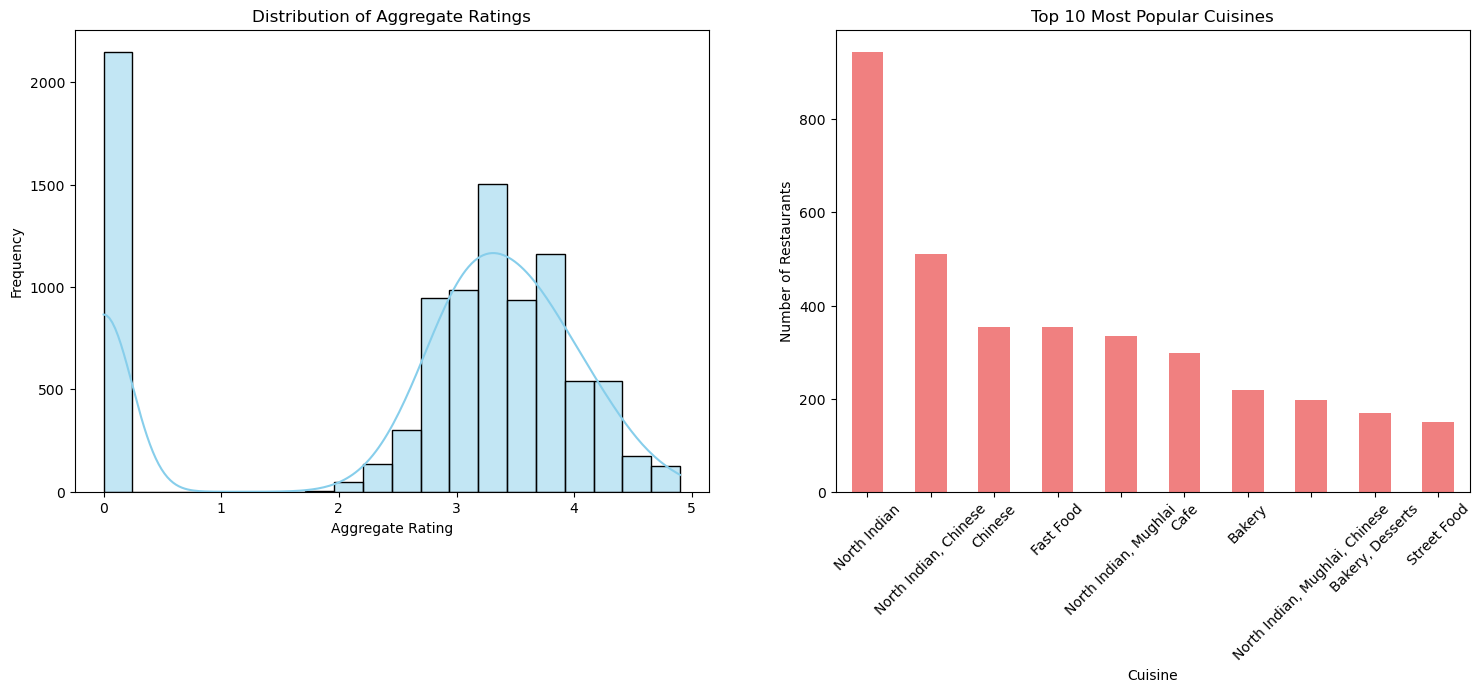

In [30]:
# Distribution of ratings
plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)

sns.histplot(df['Aggregate rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')


# Cuisine analysis - top cuisines
plt.subplot(1,2,2)
top_cuisines = df['Cuisines'].value_counts().head(10)

top_cuisines.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

<b><font color=black style='font-family:Cambria; font-size:17px'> `Distribution of Aggregate Ratings` </font></b><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The middle graph represents the `distribution of aggregate ratings` for restaurants. It forms a `bell-shaped curve`, suggesting that most ratings fall around an average value.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>This distribution could help you `analyze overall restaurant quality` and identify any patterns related to ratings.</font><br>

<font color=blue style='font-family:Cambria; font-size:15px'>`Most Popular Cuisines`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>`North Indian,   Chinese,   Fast Food,  and  South Indian` are the most frequently mentioned cuisines. </font><br>


<hr>

### Cosine Similiariy and tfidf vectorizer

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
# Step 2: Feature extraction and preprocessing
tfidf=TfidfVectorizer(stop_words='english')
tfidf_metrix=tfidf.fit_transform(df['Cuisines'])

In [33]:
cosine_sim=cosine_similarity(tfidf_metrix,tfidf_metrix)

In [34]:
def Recommend_Restaurants(user_preferences, df=df, cosine_sim=cosine_sim, top_n=5):
    # Function to recommend restaurants based on user preferences
    # user_preferences should be a dictionary with keys like 'Cuisine', 'Location', etc.
    
    # Filter restaurants based on user preferences
    if 'Cuisine' in user_preferences:
        filtered_restaurants = df[df['Cuisines'].str.contains(user_preferences['Cuisine'], case=False)]
    else:
        filtered_restaurants = df.copy()  # Use all restaurants if no cuisine preference
    
    if 'Location' in user_preferences:
        filtered_restaurants = filtered_restaurants[filtered_restaurants['City'].str.contains(user_preferences['Location'], case=False)]
    
    if filtered_restaurants.empty:
        return "No restaurants found matching the given criteria."
    
    # Remove duplicate restaurant names based on Location filtering
    filtered_restaurants = filtered_restaurants.drop_duplicates(subset=['Restaurant Name', 'City'])
    
    # Get indices of filtered restaurants
    restaurant_index = filtered_restaurants.index
    
    # Calculate similarity scores for filtered restaurants
    sim_score = []
    for i in restaurant_index:
        sim_score.append((i, cosine_sim[i].sum()))
        
    # Sort restaurants based on similarity scores
    sim_score = sorted(sim_score, key=lambda x: x[1], reverse=True)
    
    # Get top recommendations
    top_recommendations = sim_score[:top_n]
    
    # Return recommended restaurant names or details
    recommended_restaurants = df.iloc[[i[0] for i in top_recommendations]]
    recommended_restaurants = recommended_restaurants[['Restaurant Name', 'Cuisines', 'City', 'Aggregate rating', 'Rating text', 'Price range', 'Avg_cost_for_2']].sort_values(by='Aggregate rating', ascending=False)
    
    return recommended_restaurants



<font color="black" style="font-family:Cambria; font-size:20px">If User Want Particular Cuisine it shows `Restaurents` Based On The User Prefernece</font>

In [35]:
# example:
user_preference={'Cuisine':'Cafe'}

# Recommended Restaurents
Recommend_Restaurants(user_preference)

,Restaurant Name,Cuisines,City,Aggregate rating,Rating text,Price range,Avg_cost_for_2
7012,FrenZone,"North Indian, Chinese, Fast Food, Cafe",New Delhi,3.9,Good,2,800
2356,Decked Up By Garden Cafe,"Cafe, Fast Food, North Indian",Jaipur,3.9,Good,3,1200
6667,Cafe Foto Club,"North Indian, Fast Food, Italian, Chinese, Cafe",New Delhi,3.8,Good,3,1400
8737,The Chickmunks Caf,"Fast Food, Cafe, Italian, North Indian, Chinese",Noida,3.2,Average,2,550
2646,Jugnu Gaming Zone and Cafe,"Cafe, North Indian, Fast Food",New Delhi,2.9,Average,2,600


In [36]:
# Example: Testing with different cuisine preferences
user_preferences_list = [
    {'Cuisine': 'Fast Food'},
    {'Cuisine': 'Brazilian'},
    {'Cuisine': 'Italian'},
    {'Cuisine': 'Mexican'},
    {'Cuisine': 'Indian'},
]


In [37]:

for preferences in user_preferences_list:
    recommended_restaurants = Recommend_Restaurants(preferences)
    print('-'*120)
    
    print(f"Recommended Restaurants for {preferences['Cuisine']}:")
    print('\n')
    
    print(recommended_restaurants[['Restaurant Name','Cuisines','City','Avg_cost_for_2','Price range']])

------------------------------------------------------------------------------------------------------------------------
Recommended Restaurants for Fast Food:


                 Restaurant Name                          Cuisines          City  Avg_cost_for_2  Price range
851         BMG - All Day Dining  Chinese, North Indian, Fast Food      Dehradun               0            1
770          The Chicken Dinesty  Fast Food, North Indian, Chinese  Bhubaneshwar             500            2
934                 Crispy Crust  North Indian, Chinese, Fast Food     Faridabad             500            2
870                  Snax Points  Chinese, North Indian, Fast Food     Faridabad             300            1
1077  Anupam Sweets & Restaurant  North Indian, Chinese, Fast Food     Faridabad             450            1
------------------------------------------------------------------------------------------------------------------------
Recommended Restaurants for Brazilian:


          Restau

In [38]:
# Example usage:
user_preferences = {'Cuisine': 'korean'}
recommended_restaurants = Recommend_Restaurants(user_preferences)
print(f"Recommended Restaurants for {user_preferences['Cuisine']}:")
recommended_restaurants

Recommended Restaurants for korean:


,Restaurant Name,Cuisines,City,Aggregate rating,Rating text,Price range,Avg_cost_for_2
4088,Tian - Asian Cuisine Studio - ITC Maurya,"Asian, Japanese, Korean, Thai, Chinese",New Delhi,4.1,Very Good,4,7000
4005,Chor Bizarre - Hotel Broadway,"North Indian, Kashmiri, Chinese, Thai, Korean",New Delhi,3.9,Good,4,2000
8055,Chi Asian Cookhouse,"Chinese, Thai, Asian, Japanese, Korean, Seafood",Noida,3.9,Good,3,1400
1695,K2 Restaurant,"Korean, Chinese",Gurgaon,3.0,Average,4,2000
4881,K2 Multi Cuisine Restaurant,"North Indian, Mughlai, Nepalese, Tibetan, Korean",New Delhi,0.0,Not rated,3,1000


<font color="brown" style="font-family:Cambria; font-size:19px">If User Want Particular `Cuisine Based On Particular Location` it shows `Restaurents` Based On The User Prefernece</font>

In [39]:


user_preferences_location_cuisine = {'Cuisine': 'Biryani', 'Location': 'New Delhi'}
recommended_restaurants_location = Recommend_Restaurants(user_preferences_location_cuisine)
print(f"Recommended Restaurants in {user_preferences_location_cuisine['Location']} for {user_preferences_location_cuisine['Cuisine']}:")
recommended_restaurants_location

Recommended Restaurants in New Delhi for Biryani:


,Restaurant Name,Cuisines,City,Aggregate rating,Rating text,Price range,Avg_cost_for_2
4515,The Midnight Heroes,"North Indian, Biryani, Chinese, Fast Food",New Delhi,3.8,Good,2,950
5044,Spice Hut,"North Indian, Fast Food, Biryani",New Delhi,2.9,Average,2,500
5046,The Tandoori Night,"Biryani, Chinese, North Indian",New Delhi,2.8,Average,1,300
2932,Royal Kolkata Biryani,"North Indian, Chinese, Biryani",New Delhi,2.7,Average,2,500
6645,Punnu Biryani,"North Indian, Biryani, Fast Food",New Delhi,2.6,Average,2,600


In [40]:
user_preferences_location_cuisine = {"Cuisine":"Fast Food",'Location': 'Noida'}
recommended_restaurants_location = Recommend_Restaurants(user_preferences_location_cuisine)
print(f"Recommended Restaurants in {user_preferences_location_cuisine['Location']} :")
recommended_restaurants_location

Recommended Restaurants in Noida :


,Restaurant Name,Cuisines,City,Aggregate rating,Rating text,Price range,Avg_cost_for_2
8124,Night Food Service,"Fast Food, North Indian, Chinese",Noida,3.8,Good,1,350
8428,Bikanervala Bliss,"North Indian, Fast Food, Chinese",Noida,3.6,Good,3,1200
8454,Sadda Adda,"Fast Food, Chinese, North Indian",Noida,3.5,Good,1,300
8516,Sadda Taste,"North Indian, Fast Food, Chinese",Noida,3.1,Average,1,450
8546,Foodie,"North Indian, Chinese, Fast Food",Noida,2.8,Average,2,500


In [41]:
df['City'].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Bras_lia', 'Rio de Janeiro', 'So Paulo', 'Albany',
       'Armidale', 'Athens', 'Augusta', 'Balingup', 'Beechworth', 'Boise',
       'Cedar Rapids/Iowa City', 'Chatham-Kent', 'Clatskanie', 'Cochrane',
       'Columbus', 'Consort', 'Dalton', 'Davenport', 'Des Moines',
       'Dicky Beach', 'Dubuque', 'East Ballina', 'Fernley', 'Flaxton',
       'Forrest', 'Gainesville', 'Hepburn Springs', 'Huskisson',
       'Inverloch', 'Lakes Entrance', 'Lakeview', 'Lincoln', 'Lorn',
       'Macedon', 'Macon', 'Mayfield', 'Mc Millan', 'Middleton Beach',
       'Miller', 'Monroe', 'Montville', 'Ojo Caliente', 'Orlando',
       'Palm Cove', 'Paynesville', 'Penola', 'Pensacola',
       'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentham E

<font color="brown" style="font-family:Cambria; font-size:19px">If User Want `Location` Based Restaurents  it shows `Restaurents` Based On The User Prefernece</font>

In [42]:
user_preferences_location = {'Location': 'Pasay City'}
recommended_restaurants_location = Recommend_Restaurants(user_preferences_location)
print(f"Recommended Restaurants in {user_preferences_location['Location']} :")
recommended_restaurants_location

Recommended Restaurants in Pasay City :


,Restaurant Name,Cuisines,City,Aggregate rating,Rating text,Price range,Avg_cost_for_2
8,Spiral - Sofitel Philippine Plaza Manila,"European, Asian, Indian",Pasay City,4.9,Excellent,4,6000
7,Vikings,"Seafood, Filipino, Asian, European",Pasay City,4.2,Very Good,4,2000
6,Buffet 101,"Asian, European",Pasay City,4.0,Very Good,4,2000


In [43]:
# Example: Testing with different loaction  preferences
user_preferences_location = [
    {'Location': 'Pasay City'},
    {'Location': 'Dalton'},
    {'Location': 'Bhopal'},
    {'Location': 'Randburg'},
    {'Location': 'Goa'},
]


In [44]:

for preferences in user_preferences_location:
    recommended_restaurants = Recommend_Restaurants(preferences)
    print('-'*120)
    
    print(f"Recommended Restaurants for {preferences['Location']}:")
    print('\n')
    
    print(recommended_restaurants[['Restaurant Name','Cuisines','City','Avg_cost_for_2','Price range']])

------------------------------------------------------------------------------------------------------------------------
Recommended Restaurants for Pasay City:


                            Restaurant Name                            Cuisines        City  Avg_cost_for_2  Price range
8  Spiral - Sofitel Philippine Plaza Manila             European, Asian, Indian  Pasay City            6000            4
7                                   Vikings  Seafood, Filipino, Asian, European  Pasay City            2000            4
6                                Buffet 101                     Asian, European  Pasay City            2000            4
------------------------------------------------------------------------------------------------------------------------
Recommended Restaurants for Dalton:


                       Restaurant Name            Cuisines    City  Avg_cost_for_2  Price range
210        Christian and Jake's Bistro  Desserts, Sandwich  Dalton              10            1
21

<b><font color=black style='font-family:Cambria; font-size:14px'> `Based on the provided examples and outputs,  that Our restaurant recommendation system primarily relies on two key factors:` </font></b>
<br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Cuisine Preference:` It effectively `recommends restaurants` based on the type of `cuisine preferred by the user`. For example, recommendations for `Biryani` in New Delhi or `Korean` cuisine highlight this aspect.</font>
<br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Location:` The system also considers the `user's specified` location preference. It tailors recommendations to specific cities or regions, such as `Pasay City`  or `Noida` .</font>
<br>

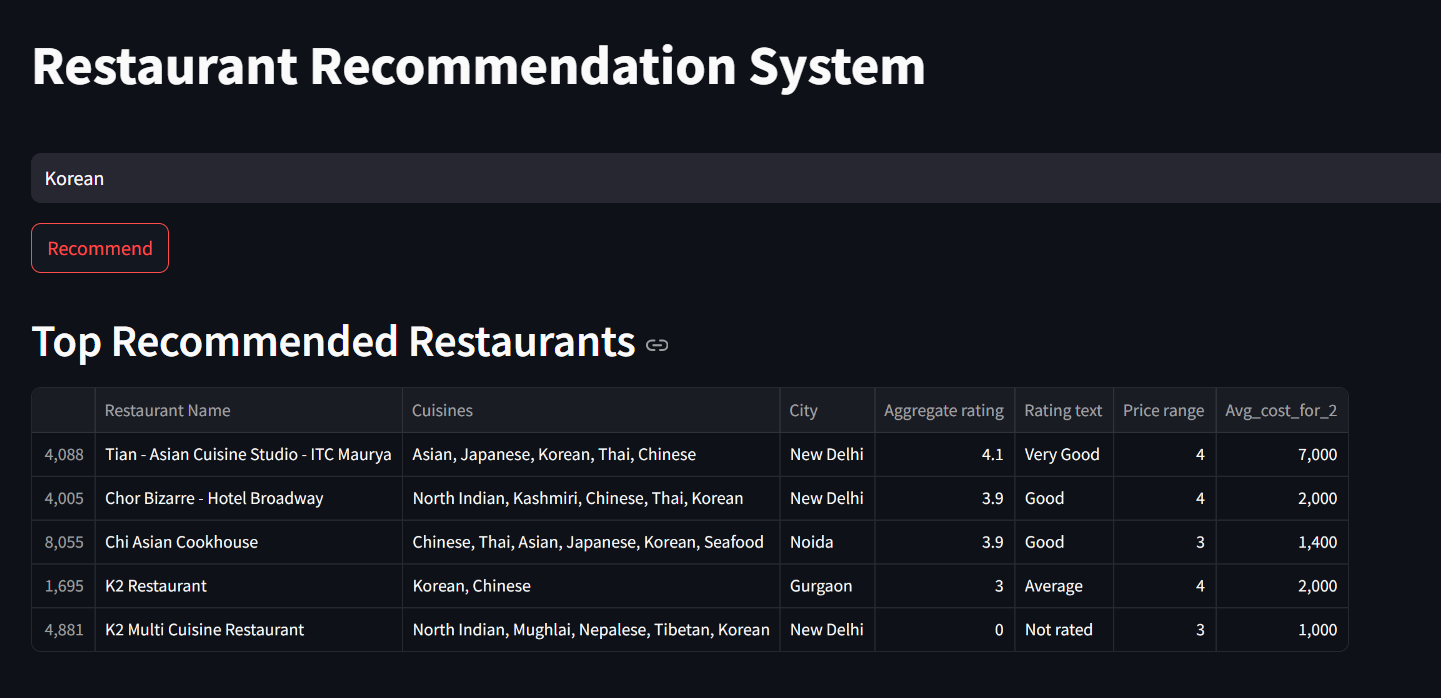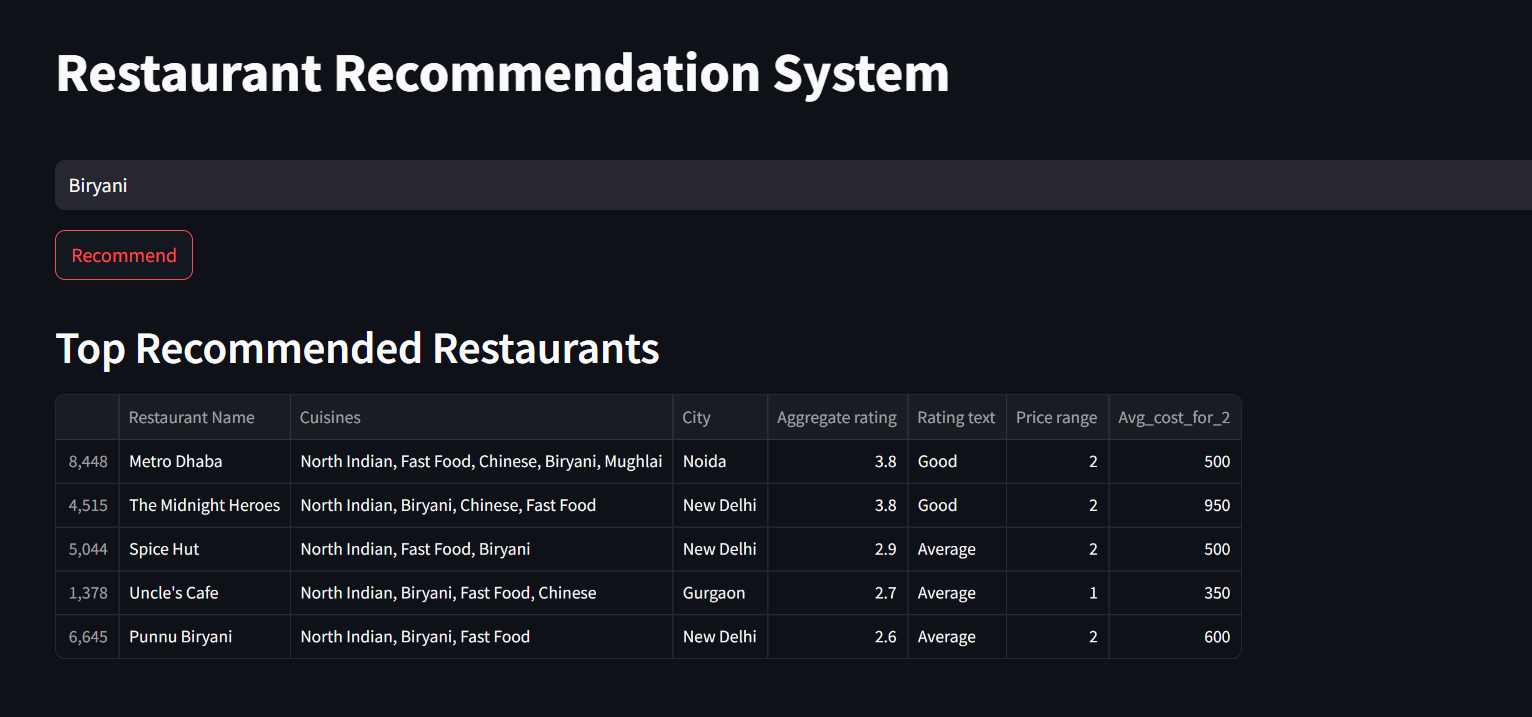

<b><font color=black style='font-family:Cambria; font-size:17px'> The project as described satisfies the `given conditions for creating a restaurant recommendation system` based on `user preferences.` Here’s how it aligns with each step: </font></b><br>

<font color="brown" style="font-family:Cambria; font-size:19px">`Step : 1`</font>
<br>

<b><font color=black style='font-family:Cambria; font-size:15px'>Preprocess the dataset by handling missing values and encoding categorical variables:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The project involves `loading a dataset (Dataset.csv)` containing `restaurant information and preprocessing it`. This includes `handling missing values in the 'Cuisines'` column and `renaming columns` (e.g., renaming 'Average Cost for two' to 'Avg_cost_for_2').</font><br>

<font color="brown" style="font-family:Cambria; font-size:19px">`Step : 2`</font>
<br>

<b><font color=black style='font-family:Cambria; font-size:15px'>Determine the criteria for restaurant recommendations (e.g., cuisine preference, price range):</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The system allows users to select their cuisine preference through a dropdown menu (`implemented in Streamlit`). This criterion is used to `filter restaurants` and `provide recommendations` based on the `selected cuisine` type.</font><br>

<font color="brown" style="font-family:Cambria; font-size:19px">`Step : 3`</font>
<br>

<b><font color=black style='font-family:Cambria; font-size:15px'>Implement a content-based filtering approach where users are recommended restaurants similar to their preferred criteria:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The recommendation system uses a `content-based filtering` approach. It computes a `similarity matrix (cosine similarity)` based on the `textual data of cuisines` offered by restaurants. Restaurants similar to the user's selected cuisine preference are recommended.</font><br>

<font color="brown" style="font-family:Cambria; font-size:19px">`Step : 4`</font>
<br>

<b><font color=black style='font-family:Cambria; font-size:15px'>Test the recommendation system by providing sample user preferences and evaluating the quality of recommendations:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The `system is tested` by providing sample user preferences (e.g., selecting a cuisine type from the dropdown menu) and evaluating the recommendations provided. This evaluation involves checking if the recommended restaurants align with the selected criteria (cuisine preference) and assessing the quality of recommendations based on factors such as restaurant ratings and other details provided.</font><br>

<font color=black style='font-family:Cambria; font-size:15px'>Therefore, the described project fulfills the objective of creating a restaurant recommendation system based on user preferences by following these systematic steps from data preprocessing to recommendation evaluation.</font><br>

<hr>



<b><font color=black style='font-family:Cambria; font-size:17px'> `Evaluation of Restaurant Recommendation System` </font></b><br>




<font color=black style='font-family:Cambria; font-size:15px'>Overall Performance:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Accuracy of Recommendations:` The system provides recommendations based on user preferences for both location and cuisine types.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Variety and Relevance:` It offers a variety of restaurants across different cities and cuisines, ensuring that users have multiple options to choose from.</font><br>

<font color=black style='font-family:Cambria; font-size:15px'>Specific Evaluations:</font><br>

<font color=blue style='font-family:Cambria; font-size:15px'>Location-Based Recommendations:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Pasay City:` Recommends high-end dining options like Spiral - Sofitel Philippine Plaza Manila, catering to diverse cuisines.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Dalton:` Focuses on American and Italian cuisines, with options like Christian and Jake's Bistro and Tony's Italian Restaurant & Pizza.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Bhopal:` Offers a mix of North Indian and Chinese cuisines, with places like Kebabsville and 10 Downing Street.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Randburg:` Suggests cafes like The Whippet, suitable for casual dining.</font><br>

<font color=black style='font-family:Cambria; font-size:15px'>Cuisine-Based Recommendations:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Biryani in New Delhi:` Provides a range of options from The Midnight Heroes to Punnu Biryani, catering specifically to Biryani enthusiasts.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Fast Food in Noida:` Recommends various fast food joints like Night Food Service and Bikanervala Bliss, reflecting local preferences.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Korean Cuisine:` Suggests upscale options such as Tian - Asian Cuisine Studio in New Delhi and Chi Asian Cookhouse in Noida, catering to Korean cuisine lovers.</font><br>

<font color=black style='font-family:Cambria; font-size:15px'>Strengths:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Diverse Recommendations:` The system effectively covers a wide range of cuisines and preferences, ensuring users get tailored suggestions.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Detailed Information:` Provides essential details such as average cost for two, price range, and aggregate rating, aiding users in decision-making.</font><br>


<b><font color=black style='font-family:Cambria; font-size:17px'> `Conclusion` </font></b><br>

<font color=blue style='font-family:Cambria; font-size:15px'>Overall, your restaurant recommendation system performs well in providing relevant and diverse dining options based on user preferences for both location and cuisine. By refining the user interface and enhancing algorithmic efficiency, you can further improve user satisfaction and engagement.</font><br>

<font color=blue style='font-family:Cambria; font-size:15px'>This evaluation outlines the effectiveness of your model in recommending restaurants, highlighting its strengths and areas for future enhancement.</font><br>
